# IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from collections import Counter

# Read CSV File

In [3]:
df = pd.read_csv('covid_19_india.csv')
df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
15801,15802,2021-06-08,8:00 AM,Telangana,-,-,564303,3394,593103
15802,15803,2021-06-08,8:00 AM,Tripura,-,-,49579,572,56169
15803,15804,2021-06-08,8:00 AM,Uttarakhand,-,-,313566,6731,334419
15804,15805,2021-06-08,8:00 AM,Uttar Pradesh,-,-,1662069,21333,1699083


# Inspect the Data Frame

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15806 entries, 0 to 15805
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       15806 non-null  int64 
 1   Date                      15806 non-null  object
 2   Time                      15806 non-null  object
 3   State/UnionTerritory      15806 non-null  object
 4   ConfirmedIndianNational   15806 non-null  object
 5   ConfirmedForeignNational  15806 non-null  object
 6   Cured                     15806 non-null  int64 
 7   Deaths                    15806 non-null  int64 
 8   Confirmed                 15806 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 802.7+ KB


# Details Of State Kerala

In [11]:
ker=df[df["State/UnionTerritory"]=="Kerala"]
ker

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
15642,15643,2021-06-04,8:00 AM,Kerala,-,-,2390779,9375,2584853
15678,15679,2021-06-05,8:00 AM,Kerala,-,-,2416639,9510,2601082
15714,15715,2021-06-06,8:00 AM,Kerala,-,-,2440642,9719,2618410
15750,15751,2021-06-07,8:00 AM,Kerala,-,-,2462071,9946,2633082


# Visualising the confirmed cases of Kerala

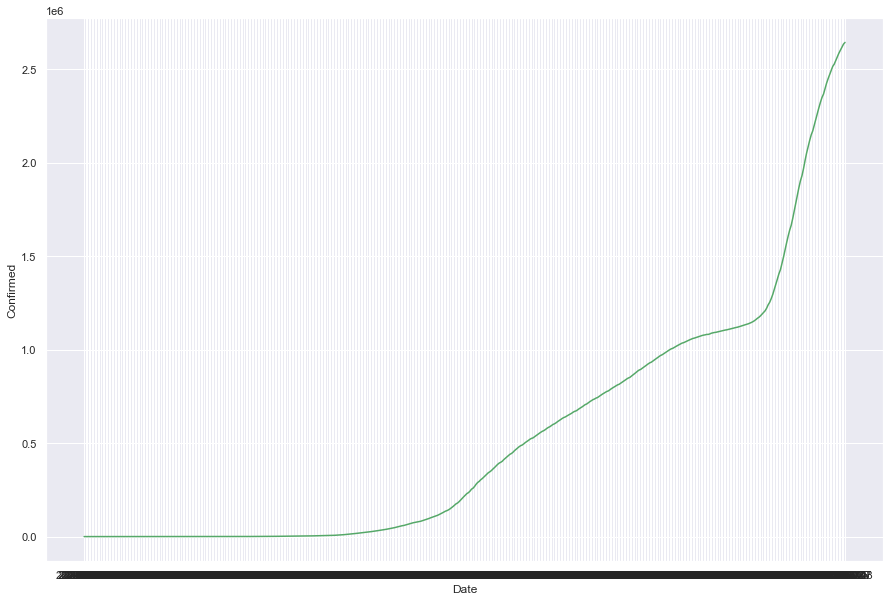

In [14]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x='Date',y='Confirmed',data=ker,color='g')
plt.show()

# VISUALISING THE DEATH CASES OF KERALA

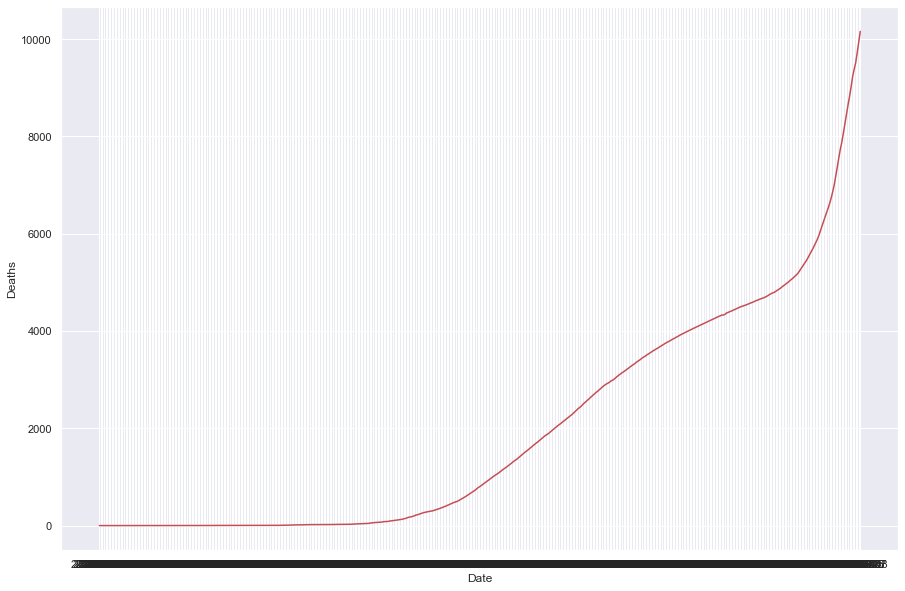

In [17]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x='Date',y='Deaths',data=ker,color='r')
plt.show()

# States which affecteted mostly by coronavirus

<AxesSubplot:>

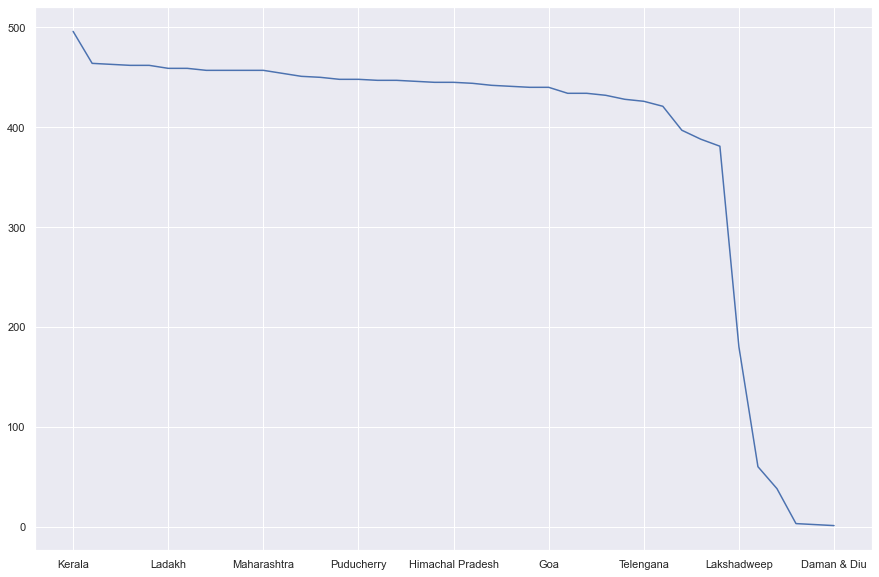

In [18]:
df['State/UnionTerritory'].value_counts().plot()


<AxesSubplot:>

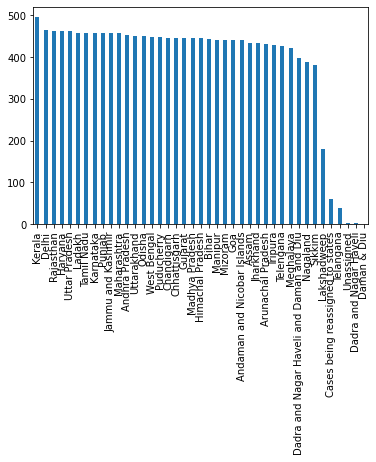

In [1]:
df['State/UnionTerritory'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='count', ylabel='State/UnionTerritory'>

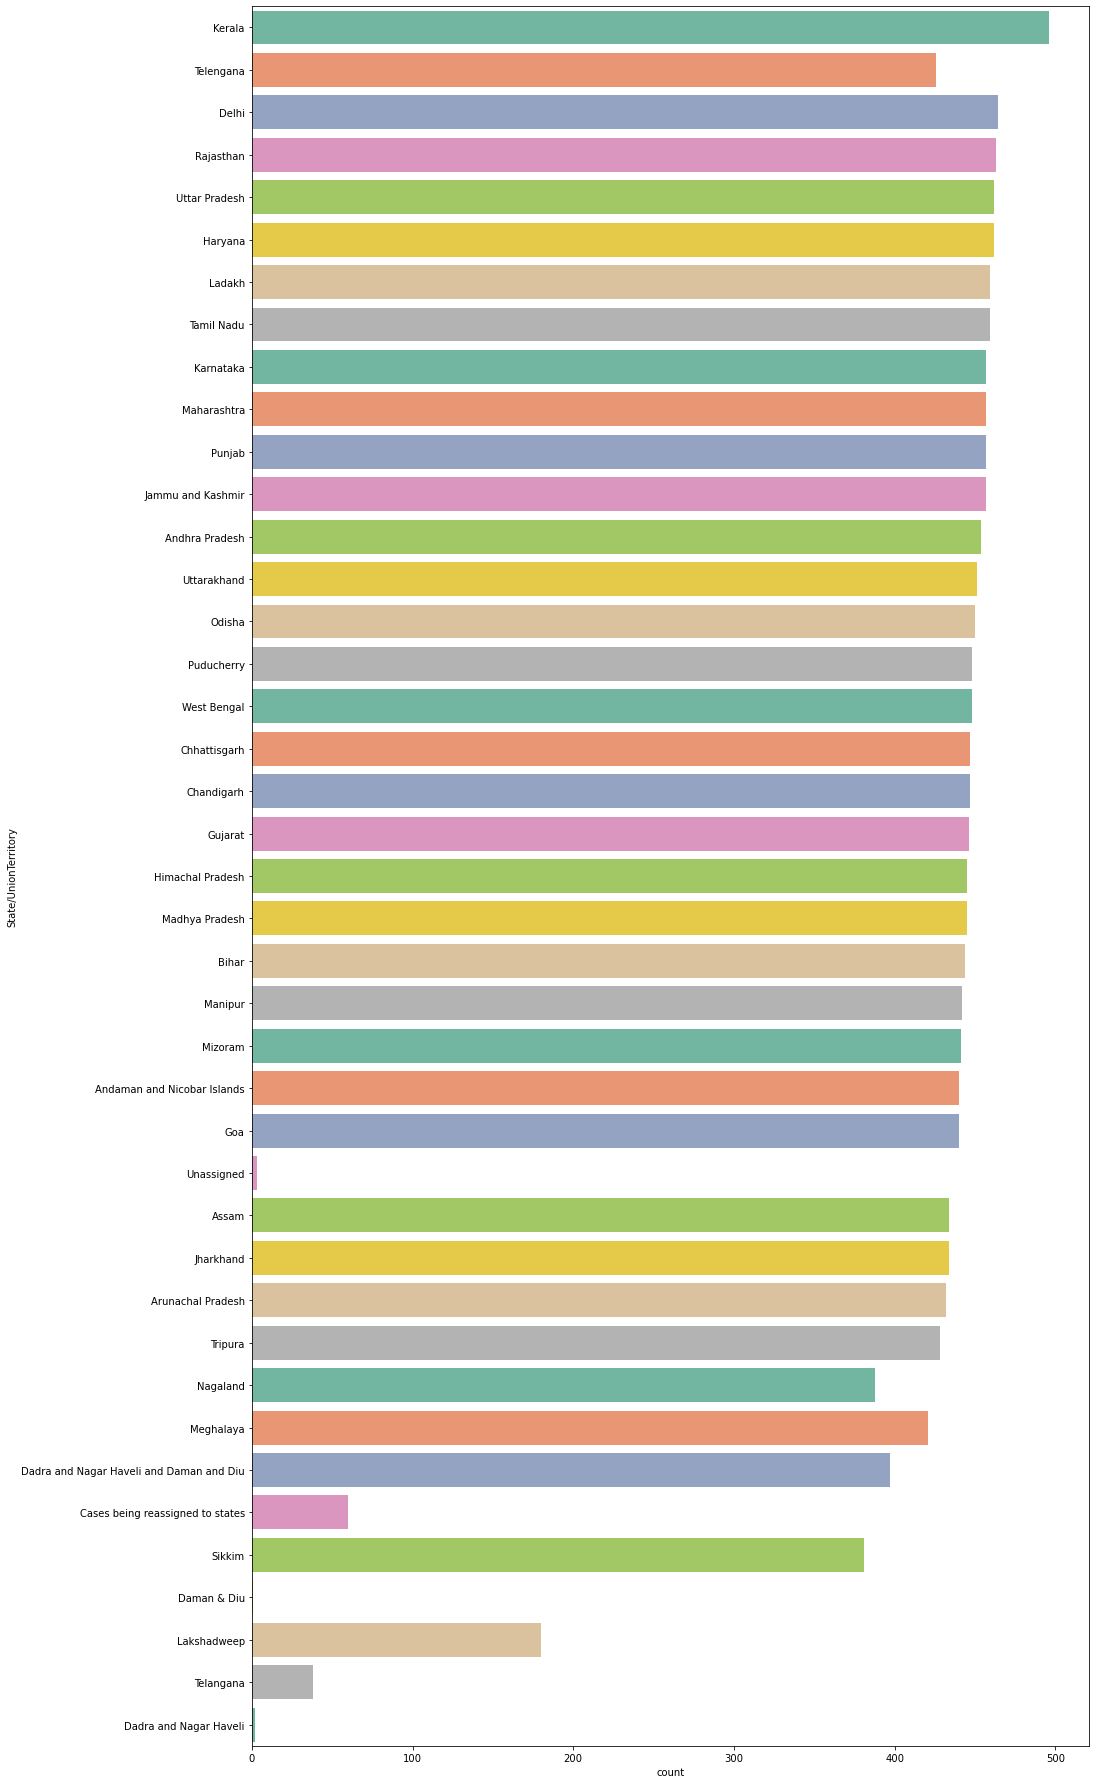

In [21]:
plt.figure(figsize=(15,32))
sns.countplot(y=df['State/UnionTerritory'],palette="Set2")

# Inspect Null Values in Coloumn

In [10]:
df.isnull()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
15801,False,False,False,False,False,False,False,False,False
15802,False,False,False,False,False,False,False,False,False
15803,False,False,False,False,False,False,False,False,False
15804,False,False,False,False,False,False,False,False,False


In [2]:
df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

# Describe

In [17]:
df.describe()

,Sno,Cured,Deaths,Confirmed
count,15806.000000,1.580600e+04,15806.000000,1.580600e+04
mean,7903.500000,1.986514e+05,3004.846324,2.204181e+05
std,4562.943513,4.299306e+05,7919.358996,4.781429e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,3952.250000,2.082000e+03,15.000000,3.291250e+03
50%,7903.500000,2.293950e+04,385.000000,2.927950e+04
75%,11854.750000,2.208698e+05,2690.500000,2.472700e+05
max,15806.000000,5.564348e+06,100470.000000,5.842000e+06


#  Total number of confirmed ,death,cured cases on different states

In [16]:
m=df.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].sum()
m

<ipython-input-16-4b748566d1ab>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  m=df.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].sum()


,Confirmed,Deaths,Cured
State/UnionTerritory,,,
Andaman and Nicobar Islands,1461311,18944,1381883
Andhra Pradesh,270440364,2117572,251842054
Arunachal Pradesh,4619157,14682,4257945
Assam,66322683,335961,61027980
Bihar,87441641,502330,81029353
Cases being reassigned to states,345565,0,0
Chandigarh,6910907,96118,6232304
Chhattisgarh,100013893,1202925,89090468
Dadra and Nagar Haveli,20722,8,20352


# Sorting data with respect to total confirmed cases

In [6]:
m=df.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].sum()
g=m.sort_values(by='Confirmed')
g

<ipython-input-6-fb5b975cec4e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  m=df.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].sum()


,Confirmed,Deaths,Cured
State/UnionTerritory,,,
Daman & Diu,2,0,0
Unassigned,161,0,0
Dadra and Nagar Haveli,20722,8,20352
Lakshadweep,285861,837,209320
Cases being reassigned to states,345565,0,0
Dadra and Nagar Haveli and Daman and Diu,1261966,758,1168144
Mizoram,1297273,2711,1126525
Andaman and Nicobar Islands,1461311,18944,1381883
Sikkim,1750240,32996,1505408


# States have death more than 100000

In [26]:
de=m['Deaths']
m[de>100000]

,Confirmed,Deaths,Cured
State/UnionTerritory,,,
Andhra Pradesh,270440364,2117572,251842054
Assam,66322683,335961,61027980
Bihar,87441641,502330,81029353
Chhattisgarh,100013893,1202925,89090468
Delhi,195424519,3344735,183302689
Goa,17505108,251525,15633792
Gujarat,90718675,1575948,80631660
Haryana,85157065,898807,78111772
Himachal Pradesh,17238921,272243,15058199


# Top states with high confirmed cases overall

In [16]:
high_con=m.sort_values(by='Confirmed',ascending=False)

high_con[0:5]

<ipython-input-16-50ac9cd80f68>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  m=df.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].sum()


,Confirmed,Deaths,Cured
State/UnionTerritory,,,
Maharashtra,735227925,15930618,647435958
Karnataka,306212399,3832006,268843089
Tamil Nadu,272629006,3827295,250272855
Andhra Pradesh,270440364,2117572,251842054
Kerala,262232084,972171,232592813


# Top states with high death overall

In [17]:
high_dea=m.sort_values(by='Deaths',ascending=False)

high_dea[0:5]

,Confirmed,Deaths,Cured
State/UnionTerritory,,,
Maharashtra,735227925,15930618,647435958
Karnataka,306212399,3832006,268843089
Tamil Nadu,272629006,3827295,250272855
Delhi,195424519,3344735,183302689
West Bengal,166859631,2712221,153418203


# Total number of confirmed ,death,cured cases on different dates

In [11]:
n=df.groupby('Date')['Confirmed','Deaths','Cured'].sum()
n

<ipython-input-11-c4d1b5fccfc1>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  n=df.groupby('Date')['Confirmed','Deaths','Cured'].sum()


,Confirmed,Deaths,Cured
Date,,,
2020-01-30,1,0,0
2020-01-31,1,0,0
2020-02-01,2,0,0
2020-02-02,3,0,0
2020-02-03,3,0,0
...,...,...,...
2021-06-04,28574350,340702,26597655
2021-06-05,28694879,344082,26795549
2021-06-06,28809339,346759,26984781


# Pie chart 

<AxesSubplot:ylabel='State/UnionTerritory'>

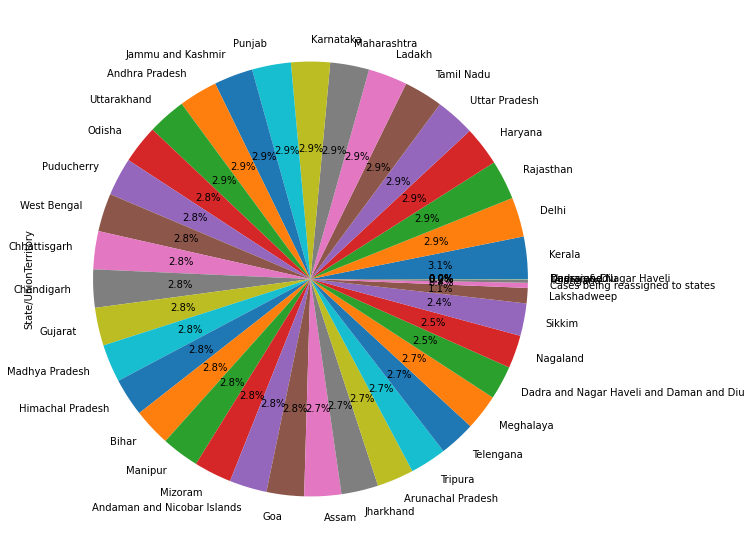

In [3]:
plt.figure(figsize=(20,10))
df['State/UnionTerritory'].value_counts().plot.pie(autopct="%1.1f%%")

# Maximum Value Of Confirmed cases

In [12]:

n['Confirmed'].max()

28996473

# Day on which maximum confirmed cases

In [13]:
n['Confirmed'].idxmax()

'2021-06-08'

# Day on which minimum number of confirmed cases

In [14]:
n['Confirmed'].idxmin()

'2020-01-30'

# State which has Maximum death

In [17]:
m['Deaths'].idxmax()

'Maharashtra'

# State which has maximum confirmed cases

In [19]:
m['Confirmed'].idxmax()

'Maharashtra'

# State/UT which has minimum Confirmed cases

In [20]:
m['Confirmed'].idxmin()

'Daman & Diu'

# Day on which maximum people get cured

In [21]:
n['Cured'].idxmax()

'2021-06-08'

# Sorting data with respect to confirmed cases on 2021-06-08

In [4]:
t=df[df.Date=='2021-06-08']
s=t.sort_values(by='Confirmed',ascending=False)
s

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
15790,15791,2021-06-08,8:00 AM,Maharashtra,-,-,5564348,100470,5842000
15785,15786,2021-06-08,8:00 AM,Karnataka,-,-,2436716,31920,2707481
15786,15787,2021-06-08,8:00 AM,Kerala,-,-,2483992,10157,2642395
15800,15801,2021-06-08,8:00 AM,Tamil Nadu,-,-,1997299,27356,2256681
15771,15772,2021-06-08,8:00 AM,Andhra Pradesh,-,-,1637149,11552,1763211
15804,15805,2021-06-08,8:00 AM,Uttar Pradesh,-,-,1662069,21333,1699083
15805,15806,2021-06-08,8:00 AM,West Bengal,-,-,1388771,16362,1432019
15778,15779,2021-06-08,8:00 AM,Delhi,-,-,1399640,24627,1429475
15776,15777,2021-06-08,8:00 AM,Chhattisgarh,-,-,947527,13243,981860
15798,15799,2021-06-08,8:00 AM,Rajasthan,-,-,922544,8687,946975


# Bar Graph of states with top confirmed cases on 2021-06-08

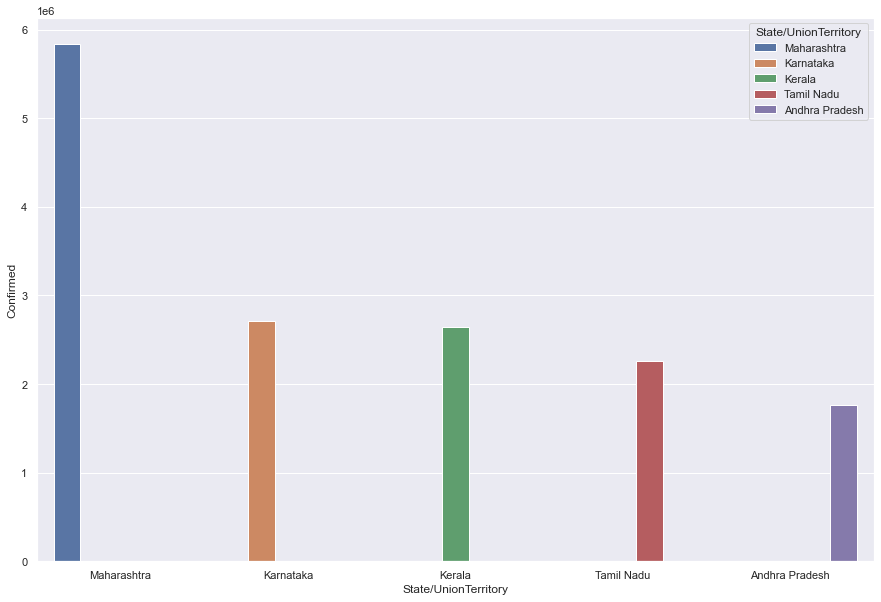

In [7]:
top_state=s[0:5]
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x='State/UnionTerritory',y='Confirmed',data=top_state, hue='State/UnionTerritory')
plt.show()

# Sorting data with respect to death cases on 2021-06-08

In [8]:
maxdeath=t.sort_values(by='Deaths',ascending=False)
maxdeath

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
15790,15791,2021-06-08,8:00 AM,Maharashtra,-,-,5564348,100470,5842000
15785,15786,2021-06-08,8:00 AM,Karnataka,-,-,2436716,31920,2707481
15800,15801,2021-06-08,8:00 AM,Tamil Nadu,-,-,1997299,27356,2256681
15778,15779,2021-06-08,8:00 AM,Delhi,-,-,1399640,24627,1429475
15804,15805,2021-06-08,8:00 AM,Uttar Pradesh,-,-,1662069,21333,1699083
15805,15806,2021-06-08,8:00 AM,West Bengal,-,-,1388771,16362,1432019
15797,15798,2021-06-08,8:00 AM,Punjab,-,-,545674,15160,580829
15776,15777,2021-06-08,8:00 AM,Chhattisgarh,-,-,947527,13243,981860
15771,15772,2021-06-08,8:00 AM,Andhra Pradesh,-,-,1637149,11552,1763211
15786,15787,2021-06-08,8:00 AM,Kerala,-,-,2483992,10157,2642395


# Bar Graph of states with top death cases on 2021-06-08

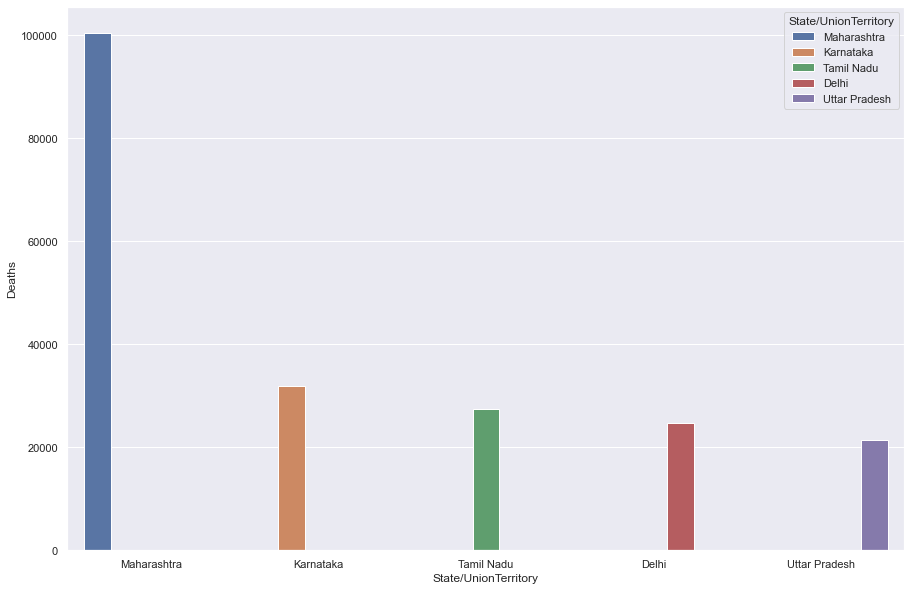

In [9]:
top_state_death=maxdeath[0:5]
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x='State/UnionTerritory',y='Deaths',data=top_state_death,hue='State/UnionTerritory')
plt.show()

# Plotting Dataframe on scatter matrix format

array([[<AxesSubplot:xlabel='Sno', ylabel='Sno'>,
        <AxesSubplot:xlabel='Cured', ylabel='Sno'>,
        <AxesSubplot:xlabel='Deaths', ylabel='Sno'>,
        <AxesSubplot:xlabel='Confirmed', ylabel='Sno'>],
       [<AxesSubplot:xlabel='Sno', ylabel='Cured'>,
        <AxesSubplot:xlabel='Cured', ylabel='Cured'>,
        <AxesSubplot:xlabel='Deaths', ylabel='Cured'>,
        <AxesSubplot:xlabel='Confirmed', ylabel='Cured'>],
       [<AxesSubplot:xlabel='Sno', ylabel='Deaths'>,
        <AxesSubplot:xlabel='Cured', ylabel='Deaths'>,
        <AxesSubplot:xlabel='Deaths', ylabel='Deaths'>,
        <AxesSubplot:xlabel='Confirmed', ylabel='Deaths'>],
       [<AxesSubplot:xlabel='Sno', ylabel='Confirmed'>,
        <AxesSubplot:xlabel='Cured', ylabel='Confirmed'>,
        <AxesSubplot:xlabel='Deaths', ylabel='Confirmed'>,
        <AxesSubplot:xlabel='Confirmed', ylabel='Confirmed'>]],
      dtype=object)

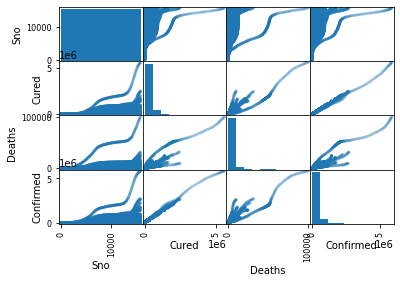

In [24]:
pd.plotting.scatter_matrix(df,alpha=0.2)

# Relationship analysis

<AxesSubplot:>

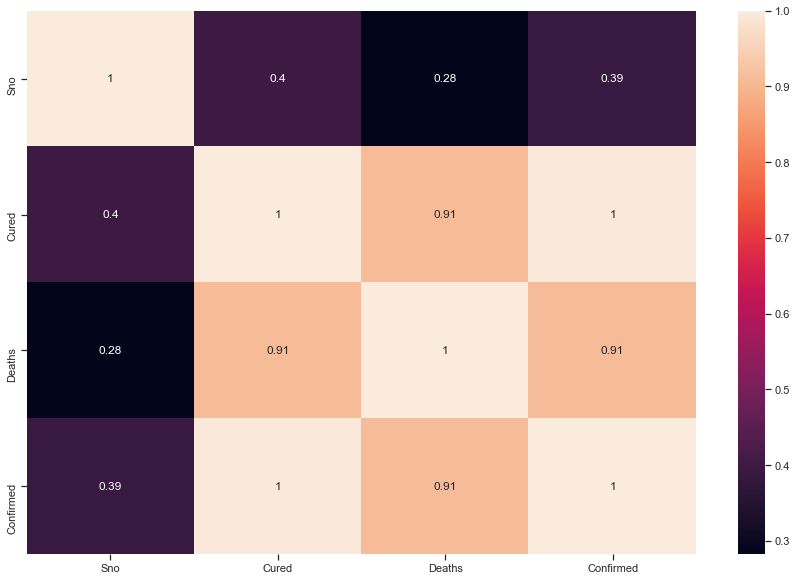

In [20]:
correlation=df.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)


# Pair plotting

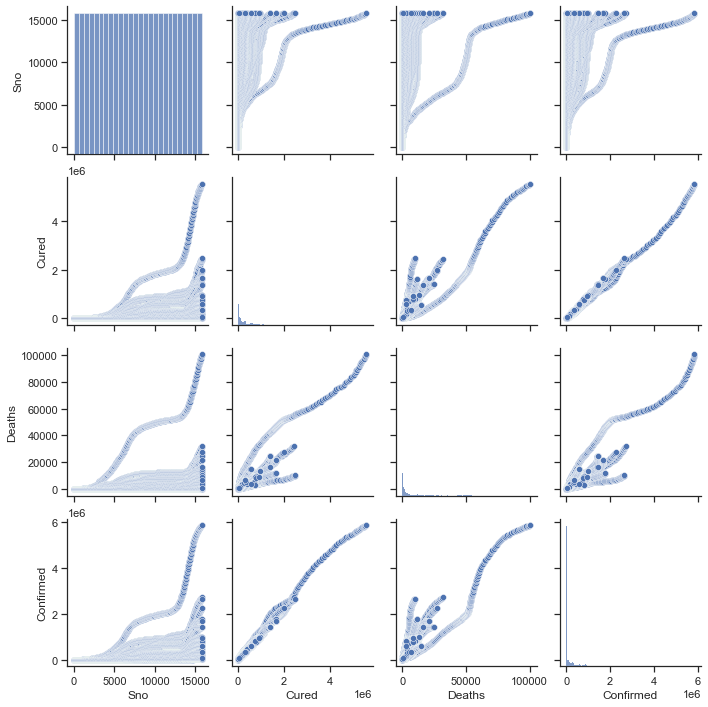

In [18]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df)

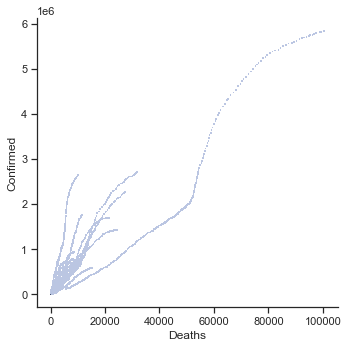

In [26]:
sns.displot(x='Deaths',y='Confirmed',data=df)

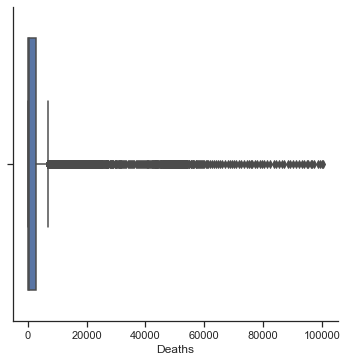

In [27]:
sns.catplot(x='Deaths',kind='box',data=df)

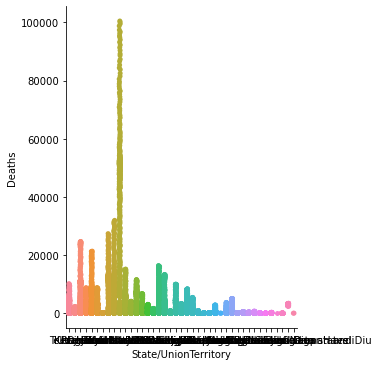

In [2]:
sns.catplot(x='State/UnionTerritory',y='Deaths',data=df)

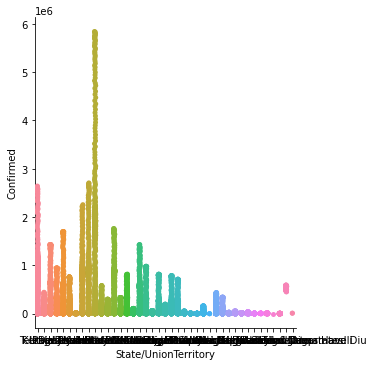

In [1]:
sns.catplot(x='State/UnionTerritory',y='Confirmed',data=df)

<AxesSubplot:xlabel='Confirmed', ylabel='Deaths'>

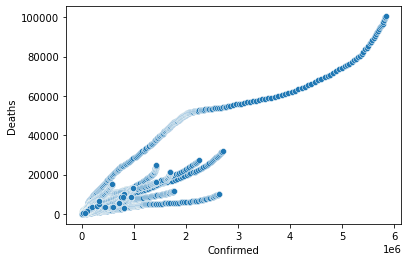

In [5]:
sns.scatterplot(x='Confirmed',y='Deaths',data=df)

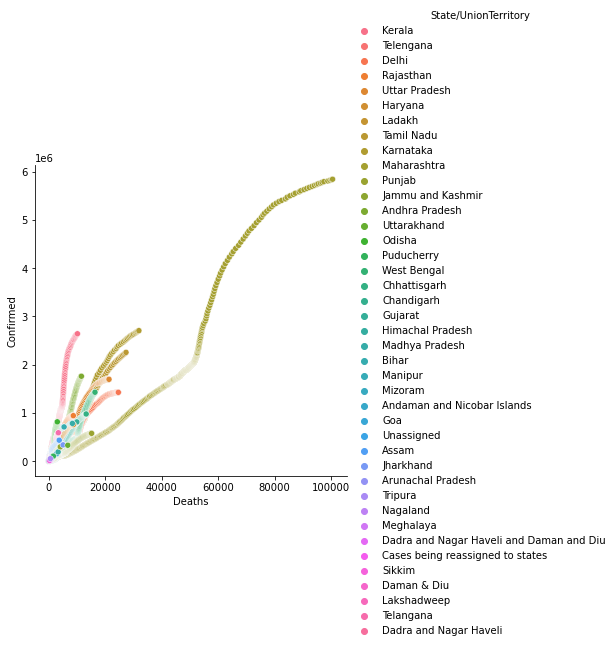

In [10]:
sns.relplot(x='Deaths',y='Confirmed',hue='State/UnionTerritory',data=df)

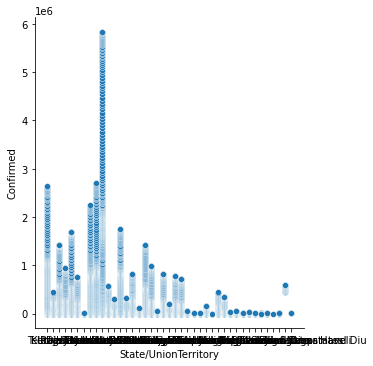

In [7]:
sns.relplot(x='State/UnionTerritory',y='Confirmed',data=df)

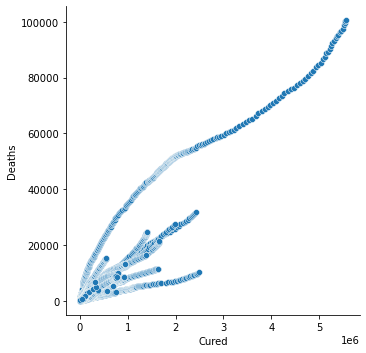

In [8]:
sns.relplot(x='Cured',y='Deaths',data=df)

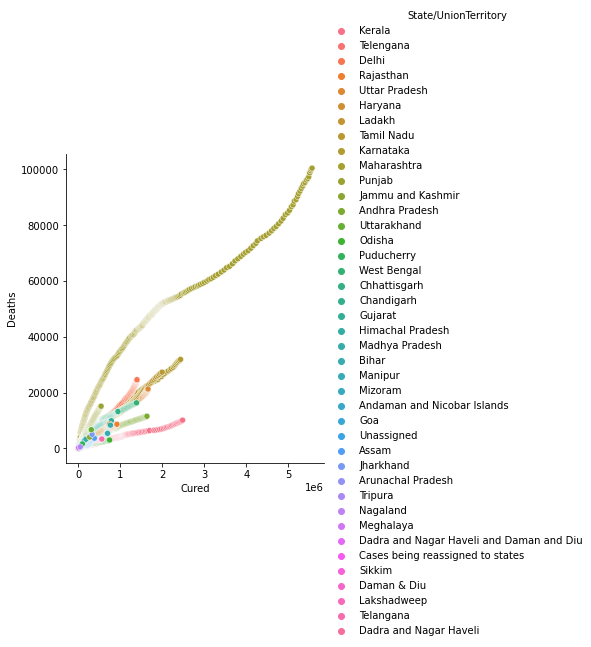

In [11]:
sns.relplot(x='Cured',y='Deaths',hue='State/UnionTerritory',data=df)

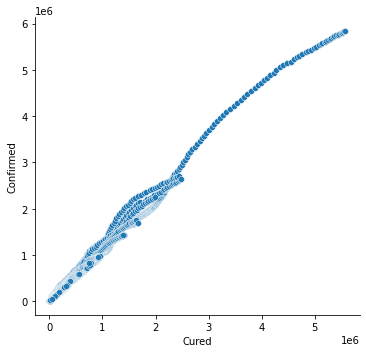

In [9]:
sns.relplot(x='Cured',y='Confirmed',data=df)

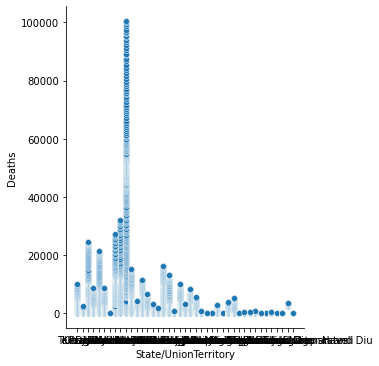

In [10]:
sns.relplot(x='State/UnionTerritory',y='Deaths',data=df)

<AxesSubplot:xlabel='Confirmed', ylabel='Density'>

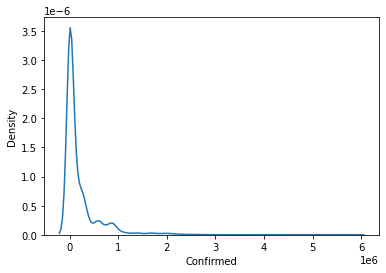

In [12]:
sns.kdeplot(data=df, x="Confirmed")

<AxesSubplot:ylabel='Density'>

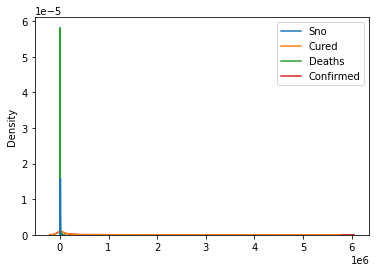

In [13]:
sns.kdeplot(data=df)

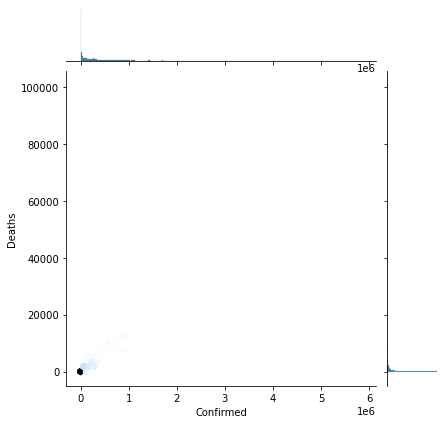

In [15]:
sns.jointplot(x="Confirmed", y = "Deaths",kind="hex",data=df)

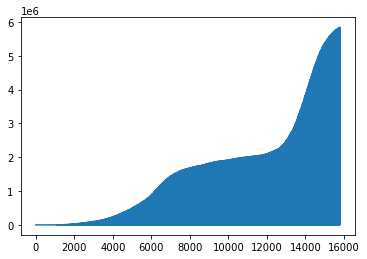

In [16]:
plt.plot(df["Confirmed"])

<AxesSubplot:>

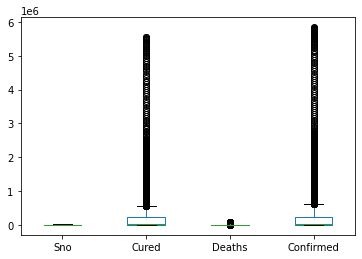

In [17]:
df.plot.box()

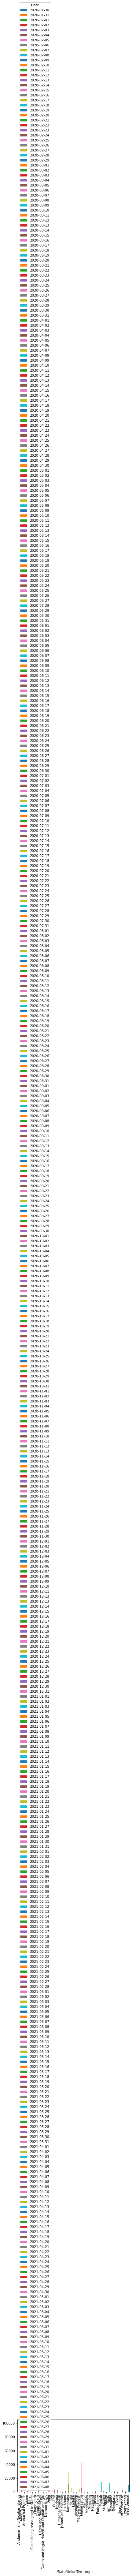

In [4]:
df.pivot(index='State/UnionTerritory',columns='Date',values='Deaths').plot(kind='bar')
plt.show()

<AxesSubplot:xlabel='State/UnionTerritory', ylabel='Deaths'>

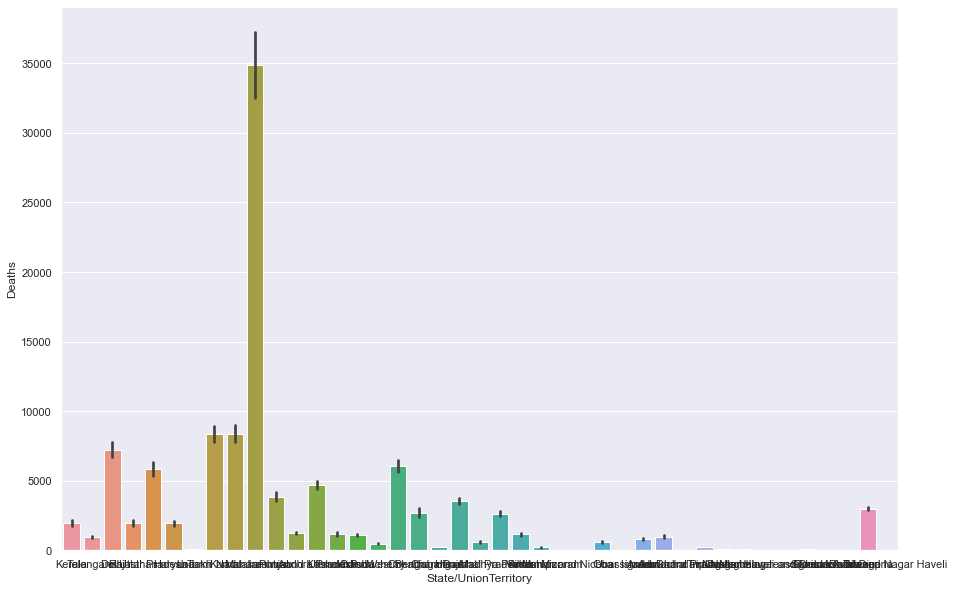

In [19]:
sns.barplot(x ="State/UnionTerritory", y ="Deaths", data = df)

<AxesSubplot:xlabel='State/UnionTerritory', ylabel='Confirmed'>

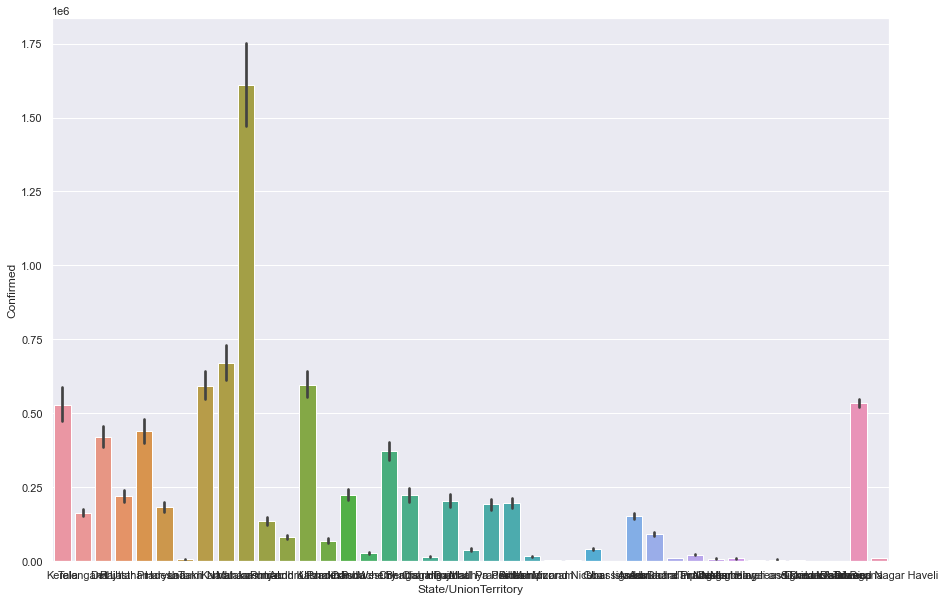

In [20]:
sns.barplot(x ="State/UnionTerritory", y ="Confirmed", data = df)

State/UnionTerritory
Andaman and Nicobar Islands                 AxesSubplot(0.125,0.125;0.775x0.755)
Andhra Pradesh                              AxesSubplot(0.125,0.125;0.775x0.755)
Arunachal Pradesh                           AxesSubplot(0.125,0.125;0.775x0.755)
Assam                                       AxesSubplot(0.125,0.125;0.775x0.755)
Bihar                                       AxesSubplot(0.125,0.125;0.775x0.755)
Cases being reassigned to states            AxesSubplot(0.125,0.125;0.775x0.755)
Chandigarh                                  AxesSubplot(0.125,0.125;0.775x0.755)
Chhattisgarh                                AxesSubplot(0.125,0.125;0.775x0.755)
Dadra and Nagar Haveli                      AxesSubplot(0.125,0.125;0.775x0.755)
Dadra and Nagar Haveli and Daman and Diu    AxesSubplot(0.125,0.125;0.775x0.755)
Daman & Diu                                 AxesSubplot(0.125,0.125;0.775x0.755)
Delhi                                       AxesSubplot(0.125,0.125;0.775x0.755)
Goa    

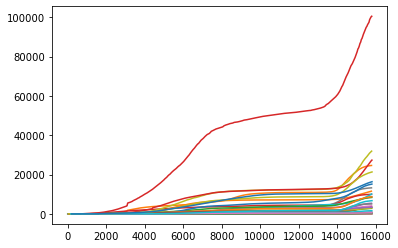

In [17]:
df.groupby('State/UnionTerritory')['Deaths'].plot()

State/UnionTerritory
Andaman and Nicobar Islands                 AxesSubplot(0.125,0.125;0.775x0.755)
Andhra Pradesh                              AxesSubplot(0.125,0.125;0.775x0.755)
Arunachal Pradesh                           AxesSubplot(0.125,0.125;0.775x0.755)
Assam                                       AxesSubplot(0.125,0.125;0.775x0.755)
Bihar                                       AxesSubplot(0.125,0.125;0.775x0.755)
Cases being reassigned to states            AxesSubplot(0.125,0.125;0.775x0.755)
Chandigarh                                  AxesSubplot(0.125,0.125;0.775x0.755)
Chhattisgarh                                AxesSubplot(0.125,0.125;0.775x0.755)
Dadra and Nagar Haveli                      AxesSubplot(0.125,0.125;0.775x0.755)
Dadra and Nagar Haveli and Daman and Diu    AxesSubplot(0.125,0.125;0.775x0.755)
Daman & Diu                                 AxesSubplot(0.125,0.125;0.775x0.755)
Delhi                                       AxesSubplot(0.125,0.125;0.775x0.755)
Goa    

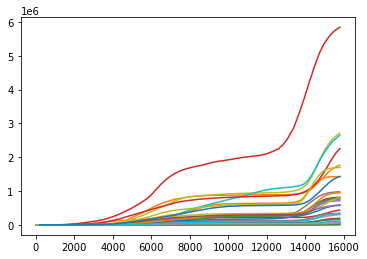

In [18]:
df.groupby('State/UnionTerritory')['Confirmed'].plot()

# Details of Total Confirmed, Deaths and cured cases of different states using                                                    loop

In [42]:
for i, row in m.iterrows():
    print(i,'\n ',row)
    print("______________________________________________ ")

Andaman and Nicobar Islands 
  Confirmed    1461311
Deaths         18944
Cured        1381883
Name: Andaman and Nicobar Islands, dtype: int64
______________________________________________ 
Andhra Pradesh 
  Confirmed    270440364
Deaths         2117572
Cured        251842054
Name: Andhra Pradesh, dtype: int64
______________________________________________ 
Arunachal Pradesh 
  Confirmed    4619157
Deaths         14682
Cured        4257945
Name: Arunachal Pradesh, dtype: int64
______________________________________________ 
Assam 
  Confirmed    66322683
Deaths         335961
Cured        61027980
Name: Assam, dtype: int64
______________________________________________ 
Bihar 
  Confirmed    87441641
Deaths         502330
Cured        81029353
Name: Bihar, dtype: int64
______________________________________________ 
Cases being reassigned to states 
  Confirmed    345565
Deaths            0
Cured             0
Name: Cases being reassigned to states, dtype: int64
_______________________

# List of all states which has affected by corona virus using nested loop

In [3]:
for i, row in m.iterrows():
        print(i)

Andaman and Nicobar Islands
Andhra Pradesh
Arunachal Pradesh
Assam
Bihar
Cases being reassigned to states
Chandigarh
Chhattisgarh
Dadra and Nagar Haveli
Dadra and Nagar Haveli and Daman and Diu
Daman & Diu
Delhi
Goa
Gujarat
Haryana
Himachal Pradesh
Jammu and Kashmir
Jharkhand
Karnataka
Kerala
Ladakh
Lakshadweep
Madhya Pradesh
Maharashtra
Manipur
Meghalaya
Mizoram
Nagaland
Odisha
Puducherry
Punjab
Rajasthan
Sikkim
Tamil Nadu
Telangana
Telengana
Tripura
Unassigned
Uttar Pradesh
Uttarakhand
West Bengal


# List of all states which has death more than 50000 using loop

In [4]:
for i, row in m.iterrows():
    if(row['Deaths']>50000):
        print(i)

Andhra Pradesh
Assam
Bihar
Chandigarh
Chhattisgarh
Delhi
Goa
Gujarat
Haryana
Himachal Pradesh
Jammu and Kashmir
Jharkhand
Karnataka
Kerala
Madhya Pradesh
Maharashtra
Manipur
Odisha
Puducherry
Punjab
Rajasthan
Tamil Nadu
Telangana
Telengana
Tripura
Uttar Pradesh
Uttarakhand
West Bengal


# Listing states in an array form 

In [7]:
l=[]
for i, row in m.iterrows():
    l.append(i)
state1=np.array(l)
state1

<ipython-input-7-8a95726b2c0c>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  m=df.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].sum()


array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar',
       'Cases being reassigned to states', 'Chandigarh', 'Chhattisgarh',
       'Dadra and Nagar Haveli',
       'Dadra and Nagar Haveli and Daman and Diu', 'Daman & Diu', 'Delhi',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Telengana', 'Tripura', 'Unassigned', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype='<U40')

# comparing death values of states using loops

In [15]:
no=1
for i, row in m.iterrows():
    print(no)
    print(i)
    print("\n")
    print(row['Deaths'])
    if(row['Deaths']<50):
        print("Good Care for Covid patients in this state, so less death is reported")
    elif((row['Deaths']>50) and (row['Deaths']<150000)):
        print("Average care for Covid patients in this state")
    else:
        print("No Good facility in hospital for taking care of covid patients, so high death is reporeted")
    print("____________________________________________________________________________________________________")
    no+=1

1
Andaman and Nicobar Islands


18944
Average care for Covid patients in this state
____________________________________________________________________________________________________
2
Andhra Pradesh


2117572
No Good facility in hospital for taking care of covid patients, so high death is reporeted
____________________________________________________________________________________________________
3
Arunachal Pradesh


14682
Average care for Covid patients in this state
____________________________________________________________________________________________________
4
Assam


335961
No Good facility in hospital for taking care of covid patients, so high death is reporeted
____________________________________________________________________________________________________
5
Bihar


502330
No Good facility in hospital for taking care of covid patients, so high death is reporeted
____________________________________________________________________________________________________
6
C

# Comparing states efficiency to control covid cases

In [16]:
no=1
for i, row in m.iterrows():
    print(no)
    print(i)
    print("\n")
    print(row['Confirmed'])
    if(row['Confirmed']<50):
        print("Government is efficient to control  the confirmed cases in state")
    elif((row['Confirmed']>50) and (row['Confirmed']<150000)):
        print("Average government controlling the confirmed cases in state ")
    else:
        print(" Government is not efficient to controll the confirmed cases")
    print("____________________________________________________________________________________________________")
    no+=1

1
Andaman and Nicobar Islands


1461311
 Government is not efficient to controll the confirmed cases
____________________________________________________________________________________________________
2
Andhra Pradesh


270440364
 Government is not efficient to controll the confirmed cases
____________________________________________________________________________________________________
3
Arunachal Pradesh


4619157
 Government is not efficient to controll the confirmed cases
____________________________________________________________________________________________________
4
Assam


66322683
 Government is not efficient to controll the confirmed cases
____________________________________________________________________________________________________
5
Bihar


87441641
 Government is not efficient to controll the confirmed cases
____________________________________________________________________________________________________
6
Cases being reassigned to states


345565
 Governme